# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

## Exercicio 2.1 - Problema Não Linearmente separável

Pede-se uma projeção não linear arbitrária que torne o problema linearmente separável.

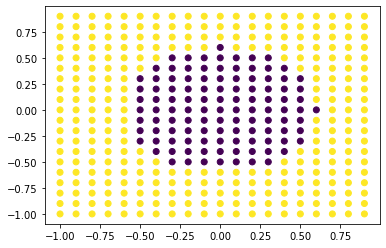

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)

grid = np.meshgrid(x, y)

def func_circle(x, y):
    return np.sqrt(x**2 + y**2)

raio = 0.6

classe = 1*(func_circle(grid[0], grid[1]) > raio)

plt.scatter(grid[0], grid[1], c = classe) 
plt.show()

Na tentativa de implementar um separador linear, temos o seguinte resultado: 

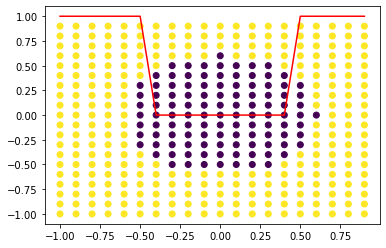

In [16]:
H = pd.DataFrame({'x': x, 'y': y, '1': 1})
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), classe) # w<-pseudoinverse(H) %*% Y

xgrid = x
ygrid = y
outputgrid = 1*(func_circle(xgrid, ygrid) > raio)

Hgrid = pd.DataFrame({'x': x, 'y': y, '1': 1})

yhatgrid = np.dot(Hgrid, w)

plt.scatter(grid[0], grid[1], c = classe) 
plt.plot(xgrid, outputgrid, 'r') # função aproximada
plt.show()


## Exercicio 2.2 - Overfitting e Underfitting

Considerando-se a Figura 2, que apresenta os dados de treinamento para um prob- lema de regressão:

<img src="pic1.png" alt="drawing" width="300"/>

Dentre os 3 modelos construídos, o que melhor representa a função geradora é o representado no gráfico de cor azul. Isso porque o ruído atribuído ao sinal de entrada permite um descolamento aleatório da função geradora, esse ruído é filtrado pela função de aproximação mais próxima do ideal.

O modelo que apresenta o menor erro de treinamento está representado na cor preto. Este está coincidindo com os pontos de treinamento mostrando que o modelo pode estar absorvendo ruídos sendo considerado um caso de overfitting.

O modelo que representa o melhor desempenho para dados novos é o modelo em Azul, pois é o mais próximo da função geradora.  Uma função com overfitting nos dados de treinamento apresenta boa acertividade com relação a esses dados. Porém, quando se utiliza o modelo para dados diferentes do treinado, como o ruído é uma variável aleatória, a assertividade vai ser menor que da função mais próxima a função geradora.



## Exercicio 2.3 - Aproximação polinomial em camadas

Inicialmente iremos gerar os dados de treinamento. A partir da função geradora 𝑓𝑔(𝑥) = 12𝑥ˆ2 + 3𝑥 + 10.
O vetor X contem amostras da função geradora amostrado de uma distribuição Normal com média 0 e desvio padrão unitário.

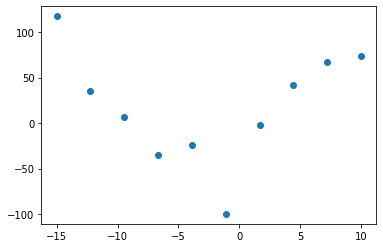

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = np.linspace(-15,10,10)

def fgx(X):
    return 0.5*X**2 + 3*X + 10

mu, sigma = 0, 4
Y = fgx(X) + 10 * np.random.normal(mu, sigma, len(X)) # Y<-fgx(X) + 10*rnorm(length(X))

#print da função
plt.scatter(X,Y)
plt.show()

Criação da Matriz H e  obtenção dos pesos w correspondentes a solução final dos coeficientes do polinômio aproximador.

In [18]:
# O número de parâmetros de um neurônio tipo MCP será sempre n + 1, onde n  é o número de variáveis, ou dimensão, do espaço de entrada.
H = pd.DataFrame({'x2': X**2, 'x': X, '1': 1}) # > H<-cbind(X^2,X,1)
# print(H)

# Como y = H * w, podemos encontrar w pela multiplicação da pseudoinversa de H e y.
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), Y) # w<-pseudoinverse(H) %*% Y
print('w: ', w)


w:  [  0.93683031   4.74243507 -35.48954813]


Podemos mensurar a qualidade dos pesos adiquiridos comparando com os pesos da equação geradora:  0.5 , 3 , 10

Vamos utilizar o modelo gerado para estimar novos valores da função geradora.

In [19]:
# Novos valores a serem utilizados
xgrid = np.arange(-15,10,0.1)
ygrid = fgx(xgrid)
# print('xgrid: ', xgrid,'ygrid: ',  ygrid)

# Gerar uma nova Matriz Hgrid para as entradas de teste xgrid
Hgrid = pd.DataFrame({'x2': xgrid**2, 'x': xgrid, '1': 1})
# print('Hgrid: ', Hgrid)

# Verificar a saída yhatgrid gerada a partir da multiplicação matricial de Hgrid com os valores w pesos encontrados
yhatgrid = np.dot(Hgrid, w) # > yhatgrid<-Hgrid %*% w
# print('yhatgrid: ', yhatgrid)

Plot dos valores iniciais a serem testados em pontos azuis.

Plot da função geradora em linha azul.

Plot da função aproximada em linha vermelha.

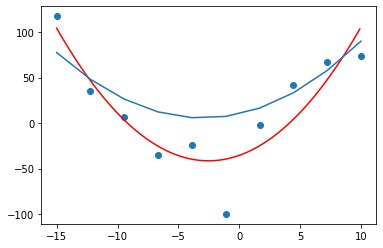

In [20]:
#print da função
plt.scatter(X,Y) # dados gerados
plt.plot(xgrid, yhatgrid, 'r') # função aproximada
plt.plot(X,fgx(X)) #função geradora
plt.show()

Teste para 100 valores: 

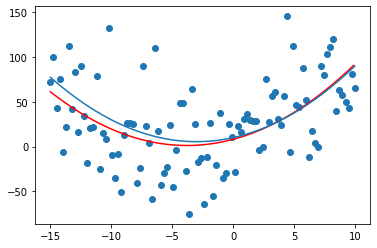

In [21]:

X = np.linspace(-15,10,100)
Y = fgx(X) + 10 * np.random.normal(mu, sigma, len(X)) # Y<-fgx(X) + 10*rnorm(length(X))
H = pd.DataFrame({'x2': X**2, 'x': X, '1': 1}) # > H<-cbind(X^2,X,1)
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), Y) # w<-pseudoinverse(H) %*% Y

xgrid = np.arange(-15,10,0.1)
ygrid = fgx(xgrid)

Hgrid = pd.DataFrame({'x2': xgrid**2, 'x': xgrid, '1': 1})

yhatgrid = np.dot(Hgrid, w) # > yhatgrid<-Hgrid %*% w

plt.scatter(X,Y) # dados gerados
plt.plot(xgrid, yhatgrid, 'r') # função aproximada
plt.plot(X,fgx(X)) #função geradora
plt.show()

Podemos ver que utilizando 100 valores de treinamento conseguimos aproximar da função geradora.
